<a href="https://colab.research.google.com/github/jeraldflowers/Neurals-Network-Build/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers

## Data Download

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[0]

In [4]:
train_labels[0]

1

## Word Dictionary

In [6]:
word_index = imdb.get_word_index()
word_index = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
for _ in train_data[0]:
  print(word_index.get(_ -3))

## One-hot Encoding Function

In [9]:
def vectorizar(sequences, dim=10000):
    results = np.zeros((len(sequences), dim))
    for i, sequences in enumerate(sequences):
        results[i, sequences]=1
    return results

## Transform Data

In [10]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Model

In [12]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

Y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Training

In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, Y_val))

Epoch 1/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1529 - acc: 0.9524 - val_loss: 0.2793 - val_acc: 0.8876
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1237 - acc: 0.9625 - val_loss: 0.2927 - val_acc: 0.8851
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1061 - acc: 0.9699 - val_loss: 0.3136 - val_acc: 0.8831
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0860 - acc: 0.9760 - val_loss: 0.3564 - val_acc: 0.8720
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0724 - acc: 0.9813 - val_loss: 0.3474 - val_acc: 0.8786
Epoch 6/20
30/30 [==============================] - 1s 46ms/step - loss: 0.0611 - acc: 0.9849 - val_loss: 0.3668 - val_acc: 0.8780
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0487 - acc: 0.9893 - val_loss: 0.3931 - val_acc: 0.8755
Epoch 8/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0394 - a

## Analyze Results

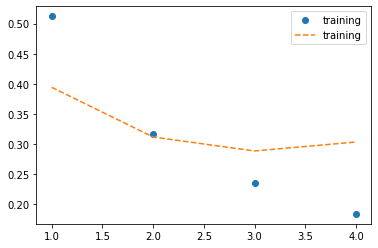

In [22]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epoch = range(1, len(loss_values) +1)
plt.plot(epoch, loss_values, 'o', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'training')
plt.legend()
plt.show()

In [23]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.3180 - acc: 0.8702


[0.3179539740085602, 0.8701599836349487]

## Less Complex Models

In [30]:
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape = (10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, Y_val))


Epoch 1/20
30/30 [==============================] - 3s 69ms/step - loss: 0.6270 - acc: 0.7191 - val_loss: 0.5434 - val_acc: 0.8455
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.4725 - acc: 0.8734 - val_loss: 0.4417 - val_acc: 0.8466
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3733 - acc: 0.8981 - val_loss: 0.3720 - val_acc: 0.8735
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3053 - acc: 0.9160 - val_loss: 0.3289 - val_acc: 0.8856
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2569 - acc: 0.9257 - val_loss: 0.3025 - val_acc: 0.8899
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2215 - acc: 0.9344 - val_loss: 0.2860 - val_acc: 0.8898
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1938 - acc: 0.9406 - val_loss: 0.2769 - val_acc: 0.8914
Epoch 8/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1715 - a

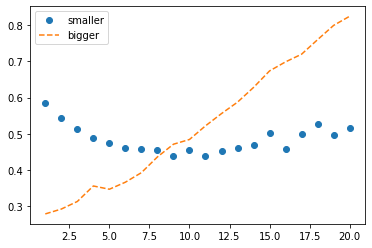

In [29]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values_2 = history2.history['val_loss']

epoch = range(1, len(loss_values) +1)
plt.plot(epoch, val_loss_values_2, 'o', label = 'smaller')
plt.plot(epoch, val_loss_values, '--', label = 'bigger')
plt.legend()
plt.show()

## Regularization

In [31]:
from keras import regularizers

In [32]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape = (10000,), 
                        kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, Y_val))


Epoch 1/20
30/30 [==============================] - 25s 45ms/step - loss: 0.5380 - acc: 0.7909 - val_loss: 0.4335 - val_acc: 0.8434
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3396 - acc: 0.9029 - val_loss: 0.3470 - val_acc: 0.8846
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2733 - acc: 0.9233 - val_loss: 0.3765 - val_acc: 0.8636
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2398 - acc: 0.9359 - val_loss: 0.3553 - val_acc: 0.8762
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2188 - acc: 0.9443 - val_loss: 0.3444 - val_acc: 0.8825
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2050 - acc: 0.9495 - val_loss: 0.3979 - val_acc: 0.8668
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1911 - acc: 0.9550 - val_loss: 0.3461 - val_acc: 0.8836
Epoch 8/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1794 - 

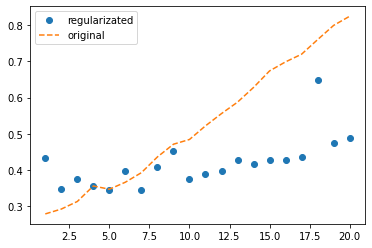

In [35]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values_3 = history3.history['val_loss']

epoch = range(1, len(loss_values) +1)
plt.plot(epoch, val_loss_values_3, 'o', label = 'regularizated')
plt.plot(epoch, val_loss_values, '--', label = 'original')
plt.legend()
plt.show()

## Dropout Test

In [34]:
model4 = models.Sequential()
model4.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history4 = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, Y_val))

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.6152 - acc: 0.6508 - val_loss: 0.4936 - val_acc: 0.8532
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.4880 - acc: 0.7884 - val_loss: 0.3981 - val_acc: 0.8655
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.4098 - acc: 0.8389 - val_loss: 0.3293 - val_acc: 0.8824
Epoch 4/20
30/30 [==============================] - 2s 52ms/step - loss: 0.3448 - acc: 0.8694 - val_loss: 0.2992 - val_acc: 0.8842
Epoch 5/20
30/30 [==============================] - 2s 52ms/step - loss: 0.3027 - acc: 0.8904 - val_loss: 0.2794 - val_acc: 0.8890
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2645 - acc: 0.9075 - val_loss: 0.2815 - val_acc: 0.8894
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2311 - acc: 0.9174 - val_loss: 0.2755 - val_acc: 0.8906
Epoch 8/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2035 - a

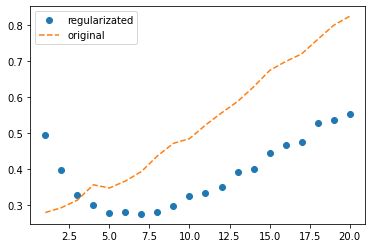

In [36]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values_4 = history4.history['val_loss']

epoch = range(1, len(loss_values) +1)
plt.plot(epoch, val_loss_values_4, 'o', label = 'regularizated')
plt.plot(epoch, val_loss_values, '--', label = 'original')
plt.legend()
plt.show()